Parseamos y estandarizamos los datos de los países de europa

In [11]:
from utils.file_utils import parse_countries_data, standarize_data
import matplotlib.pyplot as plt
attributes, countries, dataset = parse_countries_data("ex_1/resources/europe.csv")
std = standarize_data(dataset)

from ex_1.comparing_parameters import update_learn_rate_constant, update_learn_rate_exp, update_learn_rate_linear, update_radius_constant, update_radius_exp, update_radius_linear

import numpy as np

Parameters

In [12]:
# grilla de salida es de dimensión output_dimension*output_dimension
output_dimension = 4

#nro de epocas
epoch_limit = 3500

# tasa de aprendizaje inicial
initial_learning_rate = 1

# radio inicial
initial_radius = np.ceil(output_dimension*output_dimension/2)

# función de actualización de tasa de aprendizaje
update_learning_rate = update_learn_rate_exp

#función de actualización de radio
update_radius = update_radius_exp

In [13]:
import networks.kohonen as kohonen
import numpy as np
kohonen_network = kohonen.KohonenNetwork(std.shape[1], output_dimension, initial_learning_rate, initial_radius, update_radius, update_learning_rate, random_weights=False)
epochs =[]
errors = []
u_mat = []
def callback_fun(e, error):
    errors.append(error)
    epochs.append(e)
    u_mat.append(np.mean(kohonen_network.u_matrix()))

kohonen_network.train(std, countries, epoch_limit, callback_fun )


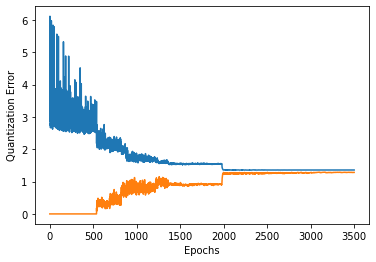

In [14]:
# plot error vs epochs
plt.plot(epochs, errors)
plt.xlabel("Epochs")
plt.ylabel("Quantization Error")

plt.plot(epochs, u_mat)

Text(0, 0.5, 'Radius')

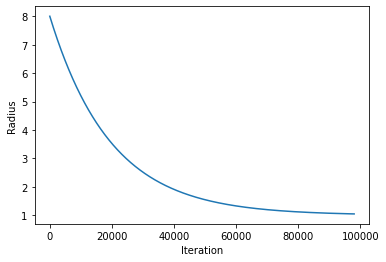

In [15]:

# plot radius values through iterations
plt.plot(range(len(kohonen_network.radius_values)), kohonen_network.radius_values)
plt.xlabel("Iteration")
plt.ylabel("Radius")

Text(0, 0.5, 'Learning Rate')

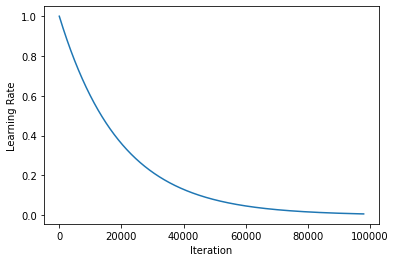

In [16]:
#plot learning rate values through iterations
# print(kohonen_network.learning_rate_values)
plt.plot(range(len(kohonen_network.learning_rate_values)), kohonen_network.learning_rate_values)
plt.xlabel("Iteration")
plt.ylabel("Learning Rate")

In [17]:
distances = np.zeros((output_dimension, output_dimension))
heatmap_data = np.zeros((output_dimension, output_dimension))
country_names = [['' for i in range(output_dimension)] for j in range(output_dimension)]
isolated_variables = np.zeros((len(std[0]),output_dimension, output_dimension))
for c,_input in enumerate(std):
    i, j, d = kohonen_network.get_activated_neuron(_input)
    distances[i][j] += d
    heatmap_data[i][j] += 1
    country_names[i][j]+=countries[c]
    for l in range(len(_input)):
        isolated_variables[l][i][j] += std[c][l]

quantization_error = np.sum(distances)/len(std)
print(quantization_error)
print(country_names)

for i in range(output_dimension):
    for j in range(output_dimension):
        distances[i][j] /= heatmap_data[i][j]
        for l in range(len(_input)):
            isolated_variables[l][i][j] /= heatmap_data[i][j]

print(quantization_error)


1.3578823237147861
[['Ukraine', 'Latvia', 'CroatiaLithuaniaSlovakia', 'Czech RepublicSlovenia'], ['Poland', 'BulgariaEstoniaHungary', '', 'BelgiumDenmark'], ['GreecePortugalSpain', '', 'AustriaNetherlands', 'Iceland'], ['United Kingdom', 'FinlandGermanyItalySweden', 'Norway', 'IrelandLuxembourgSwitzerland']]
1.3578823237147861


/tmp/ipykernel_21617/1203454702.py:19: RuntimeWarning: invalid value encountered in double_scalars
  distances[i][j] /= heatmap_data[i][j]
/tmp/ipykernel_21617/1203454702.py:21: RuntimeWarning: invalid value encountered in double_scalars
  isolated_variables[l][i][j] /= heatmap_data[i][j]


<AxesSubplot:>

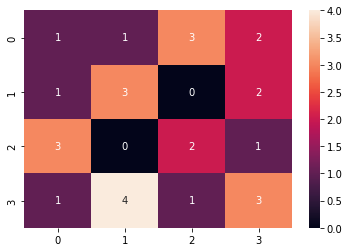

In [18]:
import seaborn as sns

sns.heatmap(heatmap_data, annot=True)


<AxesSubplot:>

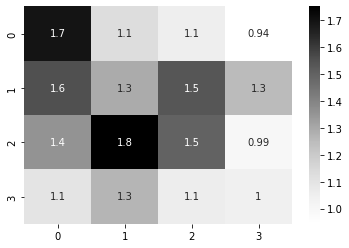

In [19]:
sns.heatmap(kohonen_network.u_matrix(), annot=True, cmap="Greys")

Plot isolated variables

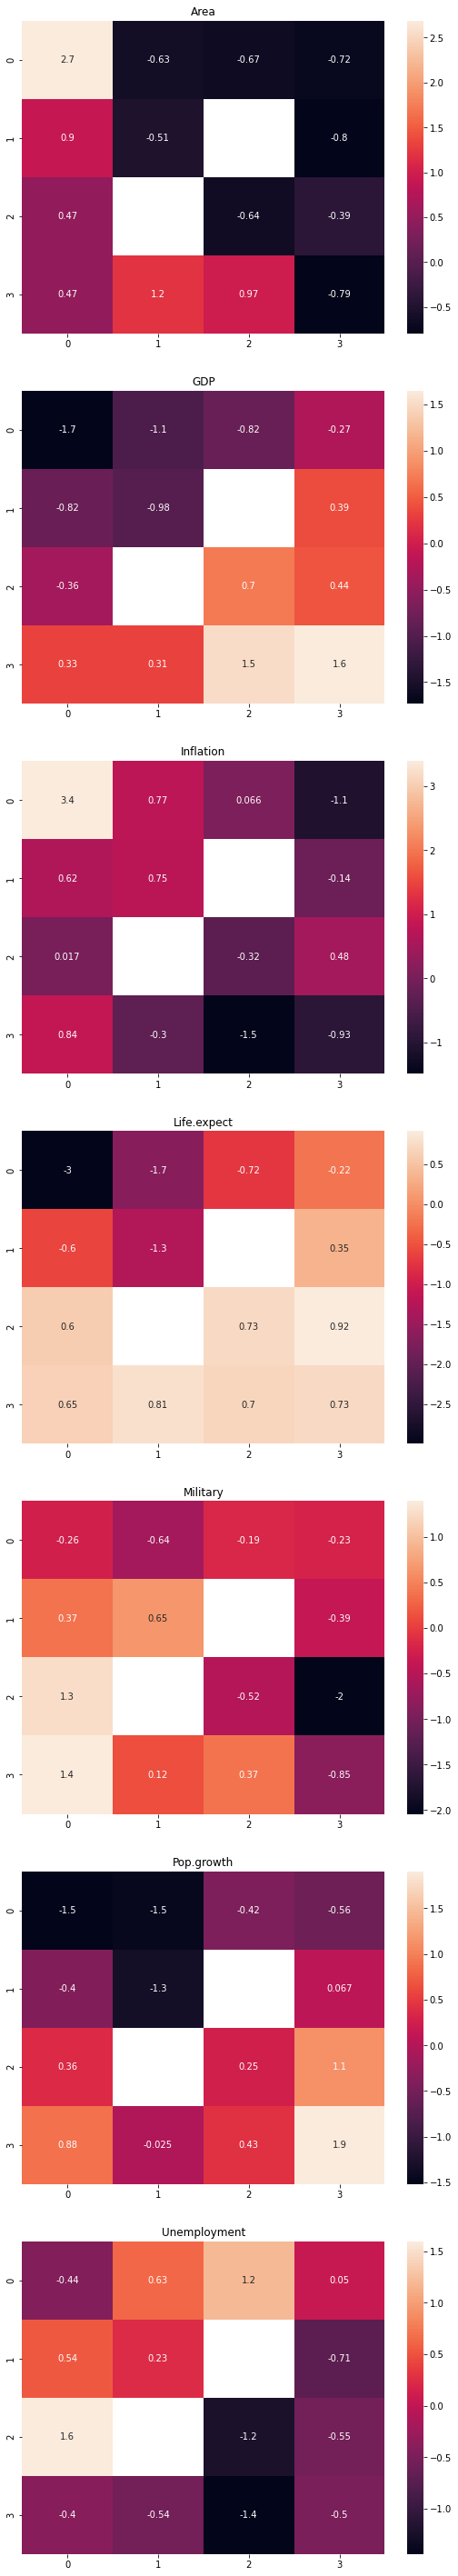

In [20]:
fig, ax = plt.subplots(len(std[0]),1, figsize=(8,40))
for i, var in enumerate(isolated_variables):
    ax[i].set_title(attributes[i])
    sns.heatmap(var, annot=True, ax=ax[i])
fig.tight_layout(pad=3.0)